# Example No 5 :DNN model by Keras for Cats & Dogs Classification

### What is the new we will learn in this example ?
- We will use dataset consist of large number of images of cats and dogs, The Kaggle "Cats and Dogs" dataset, it is a popular dataset used in computer vision tasks, particularly for image classification.
- The goal is to build a model that can accurately classify an image as either a cat or a dog.
- While this is an image-related problem, and it is typically advisable to utilize Convolution Neural Networks (CNN), we are opting to employ a Deep Neural Network (DNN) in this instance merely for training purposes. We aim to assess whether it can effectively handle the image data or not.

### What are the basic steps to build our NN model ?
> The same life cycle for any NN model as we mentioned in the previous tutorial. 
1. Load Data
2. Scaling data 
3. Define Keras Model
4. Compile Keras Model
5. Fit Keras Model
6. Evaluate Keras Model
7. Make Predictions
8. flowchart for our NN model 

### 1. Load Data

- <a rel="cats_dogs_datadets" href="https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765"> The Original Dataset here </a> : it is better to download by yourself. 


> To deal with images we need Open Source Computer Vision Library (OpenCV), python package.
* It is a popular open-source computer vision and image processing library in Python.
* OpenCV provides a wide range of functions for image processing tasks, including reading and writing images, resizing, rotating, and applying various filters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model

> Processing our dataset images 
* make two categories one for dogs and take label 0 and another for cats with label 1
* convert the image to array as it is gray images* resize all the images to assure that all in the same size 
* firstly we will see the images and try things then apply to all 

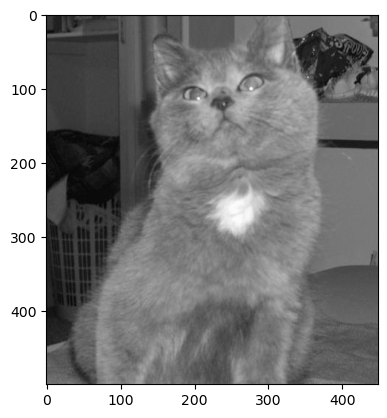

In [3]:
DATADIR = 'PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        # plt.show()  # display!
        if x==10 : 
            break        

> Let's see the last image array 

In [5]:
print(img_array) 
print(img_array.shape)

[[ 72  65  60 ...  81  83  92]
 [ 66  58  54 ...  78  78  87]
 [ 62  54  50 ...  78  76  84]
 ...
 [125 113 114 ...  95 101 105]
 [126 114 117 ... 100 107 113]
 [128 118 122 ... 105 113 120]]
(500, 448)


> Let's try different sizes for images to decide which one will be better. 

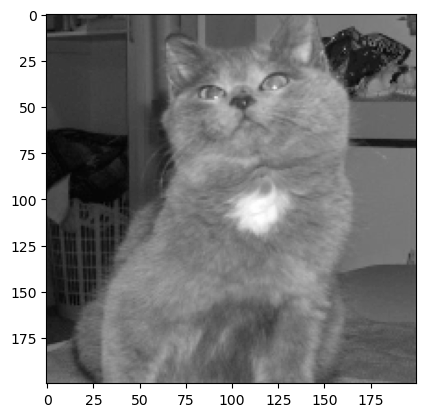

In [6]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

> Apply all the processing with the decided size for all images 

In [7]:
all_data = []

def create_all_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                all_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_all_data()

print(len(all_data))

100%|██████████| 12501/12501 [00:08<00:00, 1417.34it/s]

24946


> **Data Randomization **
- we will randomize our training data, to prevent the model from learning patterns based on the order of the data. This is crucial to ensure that the model generalizes well to unseen data.

In [8]:
import random
random.shuffle(all_data)

> We will divide our data into training and testing sets for the purpose of building our model.
* The data should be in the form of 1D array 

In [9]:
training_data = all_data[:20000]
test_data = all_data[20000:]

In [10]:
X_train = []
y_train = []
X_test = []
y_test = []


for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

# The -1 means it will automatically infer the size based on the size of the original array
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE)
X_test= np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE)

# y also should be array in newer version of tf 
y_train=np.array(y_train)
y_test=np.array(y_test)

##### If you want to save the data to use later --> use pickle  

In [ ]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()
 
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

### 2. Scaling data 
> We will build this model without scaling 


### 3. Define Keras Model

> Notes :
* The first layer should be equal the dimensions of the compressed images as the array of each image is the input of the NN 
* As it is classification (binary; cats & dogs), output layers should use softmax as activation function

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

### 4. Compile Keras Model

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### 5. Fit Keras Model


In [13]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 120.2522 - accuracy: 0.5030
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6954 - accuracy: 0.4925
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6937 - accuracy: 0.5010
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6930 - accuracy: 0.4940
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6930 - accuracy: 0.4938
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6935 - accuracy: 0.4951
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 8/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.4931
Epoch 9/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6935 - accuracy: 0.4958
Epoch 10/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6932 - accuracy: 0.49

### 6. Evaluate Keras Model


In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print('The accuracy of our model on test dataset : %.2f' % (val_acc*100))
print('The loss of our model on test dataset : %.2f' % (val_loss*100))

155/155 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4970
The accuracy of our model on test dataset : 49.70
The loss of our model on test dataset : 69.32


### 7. Make Predictions

> Executing the prediction function once over the entire dataset.

In [15]:
predictions = model.predict(X_test)

155/155 [==============================] - 0s 3ms/step


> Let's see some cases and compare! you try any image number here as you want

The model predict the image as Cat
The real image as follows 


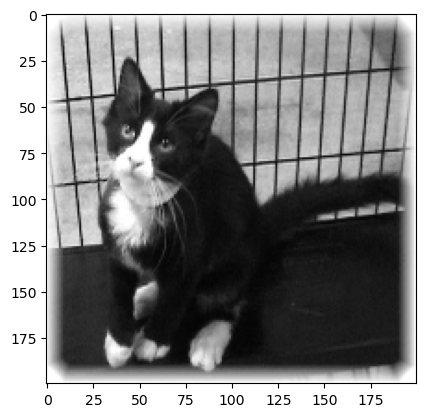

In [20]:
image_no = 5 # you can change the image number as you want

model_prediction = np.argmax(predictions[image_no])
if model_prediction == 1:
    print("The model predict the image as Dog")
elif model_prediction == 0:
    print("The model predict the image as Cat")
print("The real image as follows ")
plt.imshow(X_test[image_no], cmap='gray');

* Our Comments : 
    * The accuracy of the model is very low and can not be accepted as generalized model in practical life. 
    * The main reason for that --> we are using the DNN with image related example, while the CNN is the better option of such kind of examples, so in another tutorial we will try the CNN and see what is the difference
    - It is very clear when we tried  prediction for different images that the model can not recognize the black cats as cats but see them as dogs.  

### 8. flowchart for our NN model 

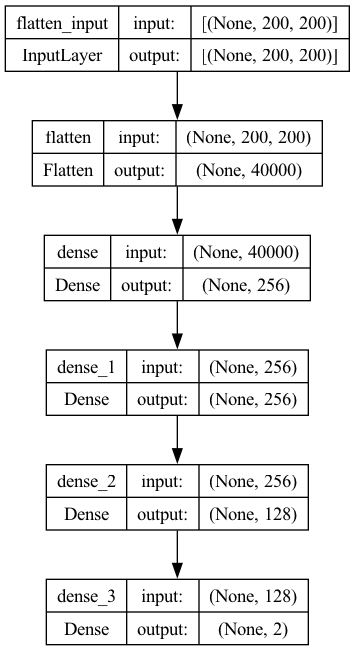

In [18]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True, rankdir="TB")

&nbsp;

### For Keras basic tools & other examples
--------------------------------------
[Keras Basic Tools for DNN](../1_Keras_BasicTools_DNN.ipynb)

[Case Study No 1](Keras_CaseStudy_no1.ipynb) : To understand how to apply rescaling to data.

[Case Study No 2](Keras_CaseStudy_no2.ipynb) : To observe the impact of increasing the number of hidden layers on the model's accuracy.

[Case Study No 3](Keras_CaseStudy_no3.ipynb) : For image classification tasks involving fashion items, a challenging dataset is employed. 

[Case Study No 4](Keras_CaseStudy_no4.ipynb) : Utilizing Keras to construct a DNN for a regression model allows for the observation of early stopping in action.

&nbsp;

### Refrences
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem?tab=repositories"> Hesham Asem GitHub for ML tools. </a>